In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from NTU_sim_hardware import NTU_processor, NTU_compiler, NTU_single_sim, NTU_sim_test_run

In [3]:
VStd = 0.1
phaseStd = 0.382 / 180 * np.pi

detuningStd = 52769
samplingRate = 5898.24e6 # 5.89824 GS/s
omega = 10e6 # 20MHz

VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)

# Decoherence time
T1 = 8.66e-6
T1_err = 0.49
T2 = 9.08e-6
T2_err = 0.74e-6
T2_echo = 16.14e-6
T2_echo_err = 3.21e-6

In [4]:
param_dict ={"VNaught": VNaught, "VStd": VStd, "phaseStd":phaseStd,
            "omega": omega, "aNaught": aNaught, "detuningStd": detuningStd,
            "pulse_amplitude": 20e6}

In [11]:
num_qubits = 1
num_gates_list = np.arange(5,105,10)
num_samples = 10

In [12]:
fidelity_baseline, error_baseline = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = False, t1 = None, t2 = None)
fidelity_t1t2, error_t1t2 = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = False, t1 = T1, t2 = T2)
fidelity_FPGA, error_FPGA = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = True, t1 = None, t2 = None)
fidelity_FPGA_t1t2, error_FPGA_t1t2 = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = True, t1 = T1, t2 = T2)

Text(0, 0.5, 'Ground State Fidelity')

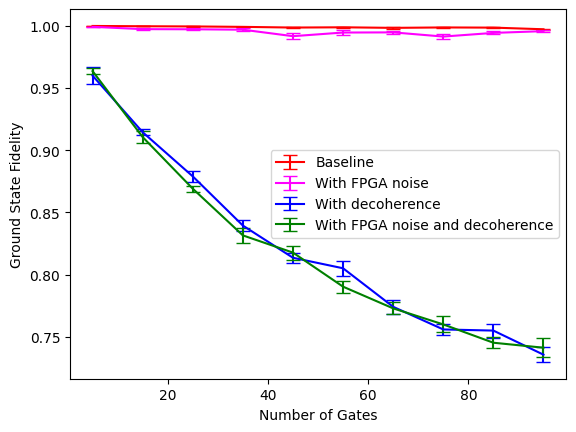

In [13]:
plt.autoscale(enable=True, axis="y", tight=False)
plt.errorbar(num_gates_list, fidelity_baseline, yerr=error_baseline, 
             color='red', capsize=5,label = 'Baseline')
plt.errorbar(num_gates_list, fidelity_FPGA, yerr=error_FPGA, 
             color='magenta', capsize=5, label = 'With FPGA noise')
plt.errorbar(num_gates_list, fidelity_t1t2, yerr=error_t1t2, 
             color='blue', capsize=5, label = 'With decoherence')
plt.errorbar(num_gates_list, fidelity_FPGA_t1t2, yerr=error_FPGA_t1t2, 
             color='green', capsize=5, label = 'With FPGA noise and decoherence')
plt.legend()
plt.xlabel("Number of Gates")
plt.ylabel("Ground State Fidelity")